In [2]:
import os, json, pprint, re
from collections import defaultdict
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
root_path = os.path.dirname(os.getcwd())
root_path

'C:\\Users\\david\\Projects\\epfl-pdm'

In [4]:
data_path = os.path.join(root_path, "data")
data_path

'C:\\Users\\david\\Projects\\epfl-pdm\\data'

In [5]:
raw_path = os.path.join(data_path, "raw")
raw_path

'C:\\Users\\david\\Projects\\epfl-pdm\\data\\raw'

In [6]:
clean_path = os.path.join(data_path, "clean")
clean_path

'C:\\Users\\david\\Projects\\epfl-pdm\\data\\clean'

In [7]:
group_paths = os.listdir(raw_path)
group_paths

['Gr1', 'Gr2', 'Gr3', 'Gr4', 'Gr5']

In [8]:
for p in group_paths:
    print(os.listdir(os.path.join(raw_path, p)))

['aufgabe1.log', 'aufgabe2.log', 'aufgabe3.log']
['aufgabe1.log', 'aufgabe2.log', 'aufgabe3.log']
['aufgabe1.log', 'aufgabe2.log', 'aufgabe3.log']
['aufgabe1.log', 'aufgabe2.log', 'aufgabe3.log']
['Aufgabe I + II.log', 'Aufgabe I.log', 'Aufgabe III.log']


In [9]:
# Quickly replace multiple strings based on a dict
def replace_all(string, table):
    for k, v in table.items():
        string = string.replace(k, v)
    return string

# Non tail-recursive flatten operation
def flatten(entry):
    children = entry.get("children")
    ret = [entry]
    
    if children:
        entry.pop("children")
        
        for c in children:
            ret += flatten(c)
            
    return ret

In [10]:
replacements = {
    "beers-law-lab_en-phetio.html?phetioStandalone&phetioLog=console:983 ": "\u200b",
    "[Intervention] Unable to preventDefault inside passive event listener due to target being treated as passive. See <URL>": ""
}

In [11]:
data = {}

for p in group_paths:
    sub_data = {}
    
    sub_path = os.path.join(raw_path, p)
    for i, sub_p in enumerate(os.listdir(sub_path)):
        batch = []
        
        with open(os.path.join(sub_path, sub_p), "r", encoding="utf-8") as f:
            raw = replace_all(f.read(), replacements).split("\u200b")[1:]
            print("Raw entries in", p, sub_p, ":", len(raw))
            
            for elem in raw:
                try:
                    batch += flatten(json.loads(elem))
                except Exception as e:
                    print("\tDropped 1 invalid element")
                    
            print("\tFlattened entries :", len(batch))
        
        sub_data[i] = batch
        
    data[p] = sub_data

Raw entries in Gr1 aufgabe1.log : 1000
	Flattened entries : 2714
Raw entries in Gr1 aufgabe2.log : 1000
	Flattened entries : 2595
Raw entries in Gr1 aufgabe3.log : 1000
	Flattened entries : 2557
Raw entries in Gr2 aufgabe1.log : 607
	Flattened entries : 1512
Raw entries in Gr2 aufgabe2.log : 1000
	Flattened entries : 3200
Raw entries in Gr2 aufgabe3.log : 1000
	Flattened entries : 3074
Raw entries in Gr3 aufgabe1.log : 743
	Flattened entries : 1869
Raw entries in Gr3 aufgabe2.log : 1000
	Flattened entries : 3025
Raw entries in Gr3 aufgabe3.log : 510
	Flattened entries : 1393
Raw entries in Gr4 aufgabe1.log : 1000
	Flattened entries : 3290
Raw entries in Gr4 aufgabe2.log : 3302
	Flattened entries : 10333
Raw entries in Gr4 aufgabe3.log : 4453
	Dropped 1 invalid element
	Flattened entries : 13239
Raw entries in Gr5 Aufgabe I + II.log : 1000
	Flattened entries : 2897
Raw entries in Gr5 Aufgabe I.log : 880
	Flattened entries : 1970
Raw entries in Gr5 Aufgabe III.log : 1000
	Flattened entri

In [12]:
for k in data.keys():
    for k2 in data[k]:
        print(k, k2, len(data[k][k2]))

Gr1 0 2714
Gr1 1 2595
Gr1 2 2557
Gr2 0 1512
Gr2 1 3200
Gr2 2 3074
Gr3 0 1869
Gr3 1 3025
Gr3 2 1393
Gr4 0 3290
Gr4 1 10333
Gr4 2 13239
Gr5 0 2897
Gr5 1 1970
Gr5 2 2526


In [13]:
comps = {}

for e in data["Gr4"][2]:
    ct = e["componentType"]
    comps[ct] = comps.get(ct, 0) + 1
    
comps

{'TTandemDragHandler': 4159,
 'TProperty': 3363,
 'TRadioButton': 12,
 'TTandemText': 2938,
 'TDerivedProperty': 2486,
 'TComboBox': 52,
 'TToggleButton': 6,
 'TPushButton': 223}

In [14]:
cts, evs, pids = set(), set(), set()
gen = ((d["componentType"], d["event"], d["phetioID"]) for k in data for k2 in data[k] for d in data[k][k2])
d = defaultdict(dict)

for c, b, a in gen:
    try:
        d[c][a] = list(set(d[c][a] + [b]))
    except:
        d[c][a] = [b]

categories = d
pprint.pprint(categories)

defaultdict(<class 'dict'>,
            {'TComboBox': {'beersLawLab.beersLawScreen.view.solutionControls.comboBox': ['popupShown',
                                                                                         'popupHidden',
                                                                                         'fired']},
             'TDerivedProperty': {'beersLawLab.beersLawScreen.model.detector.valueProperty': ['changed']},
             'TProperty': {'beersLawLab.beersLawScreen.model.cuvette.widthProperty': ['changed'],
                           'beersLawLab.beersLawScreen.model.detector.modeProperty': ['changed'],
                           'beersLawLab.beersLawScreen.model.detector.probe.locationProperty': ['changed'],
                           'beersLawLab.beersLawScreen.model.light.onProperty': ['changed'],
                           'beersLawLab.beersLawScreen.model.light.wavelengthProperty': ['changed'],
                           'beersLawLab.beersLawScreen.model

In [15]:
gen = ((k, k2, k3) for k in categories for k2 in categories[k] for k3 in categories[k][k2])
list(gen)

[('TTandemDragHandler',
  'beersLawLab.beersLawScreen.view.rulerNode.movableDragHandler',
  'dragStarted'),
 ('TTandemDragHandler',
  'beersLawLab.beersLawScreen.view.rulerNode.movableDragHandler',
  'dragEnded'),
 ('TTandemDragHandler',
  'beersLawLab.beersLawScreen.view.rulerNode.movableDragHandler',
  'dragged'),
 ('TTandemDragHandler',
  'beersLawLab.beersLawScreen.view.wavelengthControls.wavelengthSlider.thumbInputListener',
  'dragStarted'),
 ('TTandemDragHandler',
  'beersLawLab.beersLawScreen.view.wavelengthControls.wavelengthSlider.thumbInputListener',
  'dragEnded'),
 ('TTandemDragHandler',
  'beersLawLab.beersLawScreen.view.wavelengthControls.wavelengthSlider.thumbInputListener',
  'dragged'),
 ('TTandemDragHandler',
  'beersLawLab.beersLawScreen.view.solutionControls.concentrationControl.slider.thumb.dragHandler',
  'dragStarted'),
 ('TTandemDragHandler',
  'beersLawLab.beersLawScreen.view.solutionControls.concentrationControl.slider.thumb.dragHandler',
  'dragEnded'),
 ('T

In [16]:
gen = ((k, k2, k3) for k in categories for k2 in categories[k] for k3 in categories[k][k2])
d = {}

for cType, _, event in gen:
    try:
        d[event] = list(set(d[event] + [cType]))
    except:
        d[event] = [cType]
        
pprint.pprint(d)

{'changed': ['TProperty', 'TDerivedProperty'],
 'dragEnded': ['TTandemDragHandler'],
 'dragStarted': ['TTandemDragHandler'],
 'dragged': ['TTandemDragHandler'],
 'fired': ['TPushButton', 'TRadioButton', 'TComboBox', 'TScreenButton'],
 'popupHidden': ['TComboBox'],
 'popupShown': ['TComboBox'],
 'simStarted': ['TSim'],
 'textChanged': ['TTandemText'],
 'toggled': ['TToggleButton']}


In [24]:
gen = ((k, k2, k3) for k in categories for k2 in categories[k] for k3 in categories[k][k2])
d = {}

for cType, phetioID, _ in gen:
    try:
        d[cType] = list(set(d[cType] + [phetioID]))
    except:
        d[cType] = [phetioID]
        
pprint.pprint(d)

{'TComboBox': ['beersLawLab.beersLawScreen.view.solutionControls.comboBox'],
 'TDerivedProperty': ['beersLawLab.beersLawScreen.model.detector.valueProperty'],
 'TProperty': ['beersLawLab.beersLawScreen.solutions.drinkMix.concentrationProperty',
               'beersLawLab.sim.screenIndexProperty',
               'beersLawLab.beersLawScreen.solutions.potassiumPermanganate.concentrationProperty',
               'beersLawLab.beersLawScreen.model.cuvette.widthProperty',
               'beersLawLab.beersLawScreen.model.detector.probe.locationProperty',
               'beersLawLab.beersLawScreen.solutions.potassiumDichromate.concentrationProperty',
               'beersLawLab.beersLawScreen.model.light.onProperty',
               'beersLawLab.beersLawScreen.solutions.copperSulfate.concentrationProperty',
               'beersLawLab.beersLawScreen.solutions.potassiumChromate.concentrationProperty',
               'beersLawLab.beersLawScreen.model.ruler.locationProperty',
               'beers

In [140]:
# For 'TTandemDragHandler'
def getDragHandler(df, pid):
    # Filter on property
    df = df[df["phetioID"] == pid]
    
    # Filter on property
    df = df[df["phetioID"] == pid]
    
    # Exit if property absent
    if len(df) == 0:
        return None
    
    # Index on time
    df.set_index("time", inplace=True)
    
    # Remove unwanted columns
    df = df["parameters"].apply(pd.Series)
    
    return df[["x", "y"]]

# For 'TProperty' and 'TDerivedProperty'
def getProperty(df, pid):
    # Get start time
    init_time = df.loc[0]["time"]
    
    # Filter on property
    df = df[df["phetioID"] == pid]
    
    # Exit if property absent
    if len(df) == 0:
        return None
    
    # Index on time
    df.set_index("time", inplace=True)
    
    # Remove unwanted columns
    df = df["parameters"].apply(pd.Series)
    init_val = df.iloc[0]["oldValue"]
    df = df["newValue"]
    
    try:
        # Add starting value
        df.loc[init_time] = init_val
    except:
        pass
        # THIS IS TEMPORARY; THERE IS A BUG HERE
    
    return df.sort_index()

# For 'TToggleButton'
def getToggle(df, pid):
    return getProperty(df, pid).astype(int)

# For 'TPushButton', 'TRadioButton', 'TComboBox', 'TScreenButton', 'TTandemText' and 'TComboBox'
# FUTURE : EXTEND TO PLUS/MINUS BUTTONS
def getButton(df, pid):
    
    # Filter on property
    df = df[df["phetioID"] == pid]
    
    # Exit if property absent
    if len(df) == 0:
        return None
    
    # Index on time
    df.set_index("time", inplace=True)
    
    # Remove unwanted columns
    return df["event"]

def processComp(df, cType, pid):
    if cType == 'TTandemDragHandler':
        return getDragHandler(df, pid)
    elif cType == 'TToggleButton':
        return getToggle(df, pid)
    elif "Property" in cType:
        return getProperty(df, pid)
    else:
        return getButton(df, pid)

def processLog(df):
    uniques = df[["componentType", "phetioID"]].drop_duplicates()

In [113]:
df = pd.DataFrame(data["Gr4"][2])
df[df["event"] == "model"]

,messageIndex,eventType,phetioID,componentType,event,time,parameters


In [144]:
df = pd.DataFrame(data["Gr4"][2])
u = df[["componentType", "phetioID"]].drop_duplicates()
ts = {}

for _, row in u.iterrows():
    name = row["phetioID"]
    ts[name] = processComp(df, row["componentType"], name)

beersLawLab.beersLawScreen.model.detector.probe.locationProperty
beersLawLab.beersLawScreen.view.wavelengthControls.variableWavelengthRadioButton
beersLawLab.beersLawScreen.view.wavelengthControls.variableWavelengthProperty
beersLawLab.beersLawScreen.view.wavelengthControls.valueDisplay
beersLawLab.beersLawScreen.view.detectorNode.bodyNode.valueNode
beersLawLab.beersLawScreen.view.solutionControls.comboBox
beersLawLab.beersLawScreen.model.solutionProperty
beersLawLab.beersLawScreen.model.ruler.locationProperty
beersLawLab.beersLawScreen.view.wavelengthControls.presetWavelengthRadioButton
beersLawLab.beersLawScreen.model.light.onProperty
beersLawLab.beersLawScreen.view.detectorNode.bodyNode.transmittanceRadioButton
beersLawLab.beersLawScreen.model.detector.modeProperty
beersLawLab.beersLawScreen.view.detectorNode.bodyNode.absorbanceRadioButton
beersLawLab.beersLawScreen.view.resetAllButton
beersLawLab.beersLawScreen.view.wavelengthControls.wavelengthSlider.minusButton
beersLawLab.beersL

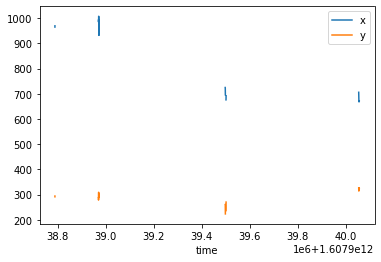

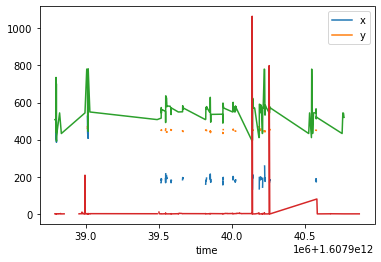

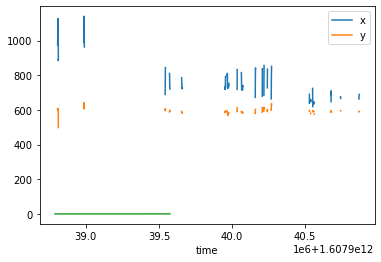

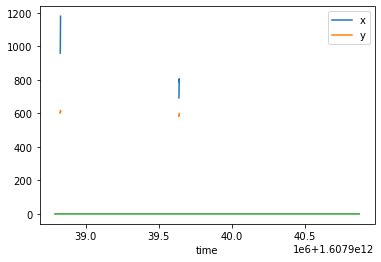

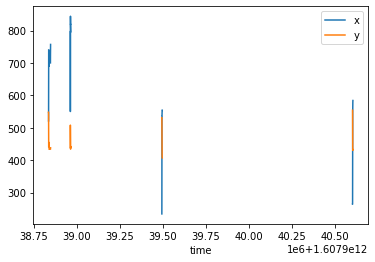

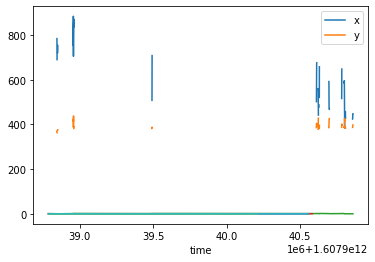

In [145]:
for name, t in ts.items():
    try:
        t.plot()
    except:
        print(name)